In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Load CSV
df = pd.read_csv('seattle-weather.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Step 2: Use 'temp_max' for prediction
temps = df['temp_max'].values.reshape(-1, 1)

# Normalize temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_temps = scaler.fit_transform(temps)

# Step 3: Create sequences (use past 7 days to predict next day)
sequence_length = 7
X, y = [], []

for i in range(sequence_length, len(scaled_temps)):
    X.append(scaled_temps[i-sequence_length:i])
    y.append(scaled_temps[i])

X, y = np.array(X), np.array(y)

# Reshape for RNN: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Split into train and test sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 5: Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh', input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Step 7: Predict
y_pred = model.predict(X_test)

# Inverse transform to get original temperature scale
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

# Step 8: Evaluation
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"📊 Evaluation Metrics:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# Step 9: Plotting actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Temperature')
plt.plot(y_pred_actual, label='Predicted Temperature')
plt.title("Seattle Temperature Prediction (RNN)")
plt.xlabel("Days")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'seattle-weather.csv'

In [ ]:
# Long Short-Term Memory (LSTM) – Viva Preparation Notes

## 📘 What is LSTM?

- LSTM stands for **Long Short-Term Memory**.
- It is a special type of **Recurrent Neural Network (RNN)**.
- LSTM is designed to **remember long-term dependencies**.
- It solves the **vanishing gradient problem** in traditional RNNs.

---

## 🔍 Why Use LSTM?

- RNNs forget information over long sequences.
- LSTM has memory cells that retain important information longer.
- Ideal for sequence prediction tasks like:
  - Language modeling
  - Time series forecasting
  - Speech recognition

---

## 🧠 Components of an LSTM Cell

Each LSTM cell has 3 gates and 1 memory unit:

1. **Forget Gate** – decides what to forget.
2. **Input Gate** – decides what to store.
3. **Cell State** – the actual memory of the cell.
4. **Output Gate** – decides what to output.

---

## 🔗 Notations

- `xₜ` – input at time `t`
- `hₜ` – hidden state at time `t` (also output)
- `Cₜ` – cell state (memory) at time `t`
- `σ` – sigmoid activation function (range: 0 to 1)
- `tanh` – hyperbolic tangent function (range: -1 to 1)
- `*` – element-wise multiplication
- `W`, `b` – learnable weights and biases

---

## 📐 LSTM Equations (Step-by-Step)

### 1. Forget Gate
Decides what information to discard from the previous cell state.

fₜ = σ(W_f · [hₜ₋₁, xₜ] + b_f)

yaml
Copy
Edit

---

### 2. Input Gate
Decides which new information to store in the cell state.

iₜ = σ(W_i · [hₜ₋₁, xₜ] + b_i)
C̃ₜ = tanh(W_C · [hₜ₋₁, xₜ] + b_C)

yaml
Copy
Edit

---

### 3. Cell State Update
Updates the old cell state `Cₜ₋₁` into the new cell state `Cₜ`.

Cₜ = fₜ * Cₜ₋₁ + iₜ * C̃ₜ

yaml
Copy
Edit

---

### 4. Output Gate
Determines the hidden state (output) for the current time step.

oₜ = σ(W_o · [hₜ₋₁, xₜ] + b_o)
hₜ = oₜ * tanh(Cₜ)

yaml
Copy
Edit

---

## 📝 Summary Table of Gates

| Gate        | Formula                                       | Purpose                     |
|-------------|-----------------------------------------------|-----------------------------|
| Forget Gate | `fₜ = σ(W_f · [hₜ₋₁, xₜ] + b_f)`             | Forget old memory           |
| Input Gate  | `iₜ = σ(W_i · [hₜ₋₁, xₜ] + b_i)`             | Learn new memory            |
| Candidate    | `C̃ₜ = tanh(W_C · [hₜ₋₁, xₜ] + b_C)`         | New values to be stored     |
| Cell State  | `Cₜ = fₜ * Cₜ₋₁ + iₜ * C̃ₜ`                  | Updated long-term memory    |
| Output Gate | `oₜ = σ(W_o · [hₜ₋₁, xₜ] + b_o)`             | Decide what to output       |
| Hidden State| `hₜ = oₜ * tanh(Cₜ)`                         | Final output of this step   |

---

## ✅ Advantages of LSTM

- Remembers long sequences
- Solves vanishing gradient problem
- Handles time-dependent data
- Learns context in sequences
- Stable training over long sequences

---

## 📊 Applications of LSTM

- Language translation
- Text generation
- Speech recognition
- Sentiment analysis
- Stock price prediction
- Time series anomaly detection

---

## 💬 Simple Example

Input: `"I want to eat an ___"`

LSTM can remember the past context "eat an" and predict:
Output: "apple"

yaml
Copy
Edit

---

## 🧠 Intuition Recap

- **Forget Gate**: "Should I forget the old info?"
- **Input Gate**: "What new info should I store?"
- **Cell State**: "What's the total memory now?"
- **Output Gate**: "What should I output?"

---

## 🔚 Final Viva-Ready Points

1. LSTM is an advanced version of RNN with memory cells.
2. It avoids vanishing gradients using gates and cell state.
3. Uses sigmoid and tanh activations in gate mechanisms.
4. Updates memory using a combination of forget, input, and candidate.
5. Widely used in NLP, speech, and time series domains.

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0780
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0096
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0088
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084
Epoch 9/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085
Epoch 10/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078
Epoch 11/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077
Epoch 12/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074
Epoch 13/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076
Epoch 14/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070
Epoch 15/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078
Epoch 16/30
73/73 ━━━━━━━━━━━━

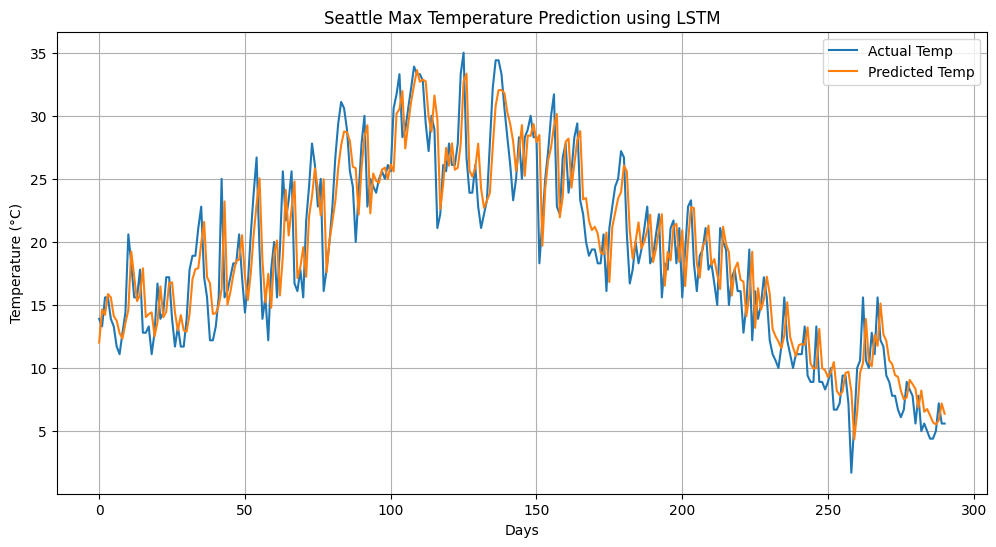

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load the data
df = pd.read_csv("seattle-weather.csv")

# Fix the date format issue
df['date'] = pd.to_datetime(df['date'])  # Auto-detect format

# Step 2: Use 'temp_max' column
temps = df['temp_max'].values.reshape(-1, 1)

# Step 3: Normalize temperatures
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_temps = scaler.fit_transform(temps)

# Step 4: Create sequences (7 days → next day)
sequence_length = 7
X, y = [], []

for i in range(sequence_length, len(scaled_temps)):
    X.append(scaled_temps[i-sequence_length:i])
    y.append(scaled_temps[i])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM expects 3D input

# Step 5: Split into train and test
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 6: Build LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Inverse transform
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Step 10: Evaluation
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print("📊 Evaluation Metrics:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE : {mae:.2f}")
print(f"✅ R²  : {r2:.2f}")

# Step 11: Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Temp')
plt.plot(y_pred_actual, label='Predicted Temp')
plt.title("Seattle Max Temperature Prediction using LSTM")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0786
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0084
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076
Epoch 9/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080
Epoch 10/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086
Epoch 11/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076
Epoch 12/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072
Epoch 13/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070
Epoch 14/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069
Epoch 15/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064
Epoch 16/30
73/73 ━━━━━━━━━━━━

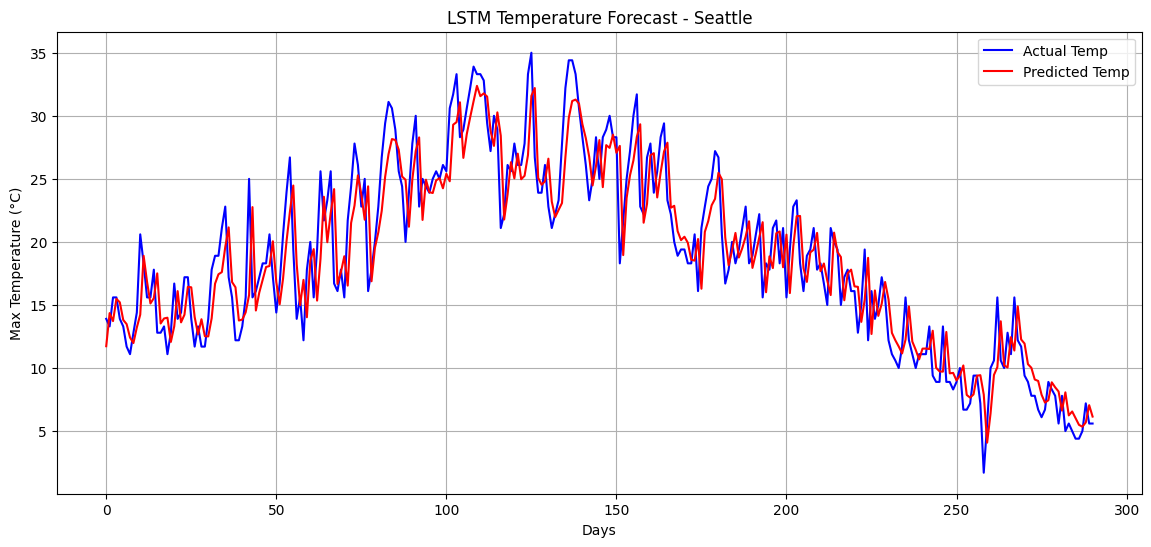

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Custom Evaluation Metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Step 1: Load data
df = pd.read_csv("seattle-weather.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 2: Use 'temp_max'
temps = df['temp_max'].values.reshape(-1, 1)

# Step 3: Normalize
scaler = MinMaxScaler()
scaled_temps = scaler.fit_transform(temps)

# Step 4: Sequence creation
seq_len = 7
X, y = [], []

for i in range(seq_len, len(scaled_temps)):
    X.append(scaled_temps[i-seq_len:i])
    y.append(scaled_temps[i])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Split data
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 6: Build LSTM model
model = Sequential([
    LSTM(units=64, input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Reverse scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Step 10: Evaluation
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)
mape_val = mape(y_test_actual, y_pred_actual)
smape_val = smape(y_test_actual, y_pred_actual)

print("\n📊 Evaluation Metrics:")
print(f"✅ RMSE  : {rmse:.2f}")
print(f"✅ MAE   : {mae:.2f}")
print(f"✅ R²    : {r2:.2f}")
print(f"✅ MAPE  : {mape_val:.2f}%")
print(f"✅ SMAPE : {smape_val:.2f}%")

# Step 11: Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Temp', color='blue')
plt.plot(y_pred_actual, label='Predicted Temp', color='red')
plt.title('LSTM Temperature Forecast - Seattle')
plt.xlabel('Days')
plt.ylabel('Max Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
